# 数字图像处理实验九

## 任务1

- 自己编程实现书本10.3.2（基本的全局阈值处理）和10.3.3（最优全局阈值处理）中提到的两种分割方法，

- 对rice.tif，finger.tif和poly.tif进行分割，并对比结果。

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [52]:
def show(imglist:list):
    for id,img in enumerate(imglist):
        cv2.imshow(f"{id}",img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
def show_plt(imglist):
    for img in imglist:
        plt.imshow(img[:,:,::-1])
        plt.show()

In [53]:
rice = cv2.imread("rice.tiff",0)
poly = cv2.imread("poly.tif",0)
finger = cv2.imread("finger.tif",0)

In [77]:
def meaniteration(img):
    img_array = img.astype("float")
    threshold=(np.max(img_array)+np.min(img_array))/2# 设置初始阈值
    # 根据阈值将图像进行分割为前景和背景，分别求出两者的平均灰度
    while True:
        foreground_mean = np.mean(img_array[img_array<=threshold])
        background_mean = np.mean(img_array[img_array>threshold])
        if threshold==int((foreground_mean+background_mean)/2):
            break
        else:
            threshold=int((foreground_mean+background_mean)/2)
    return threshold

In [83]:
def meaniteration_test(img):
    threshold=meaniteration(img)
    _, th1 = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)
    plt.imshow(img)
    plt.set_cmap('gray')
    plt.title("Original")
    plt.show()
    # plt.hist(img.ravel(), 256)
    # plt.title("Original-Hist") # 显示直方图
    # plt.show()   
    plt.imshow(th1)
    plt.set_cmap('gray')
    plt.title("Meaniterated")
    plt.show()
    # plt.hist(th1.ravel(), 256)
    # plt.title("Meaniterated-Hist")
    # plt.show()          

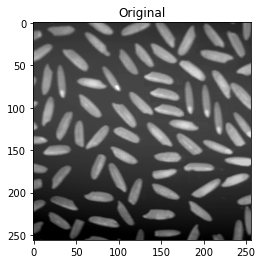

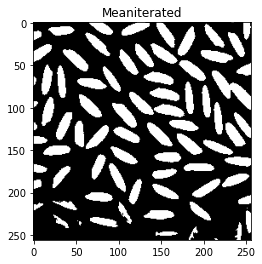

In [84]:
meaniteration_test(rice)

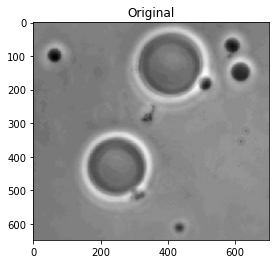

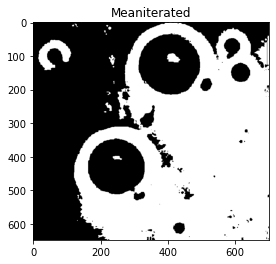

In [85]:
meaniteration_test(poly)

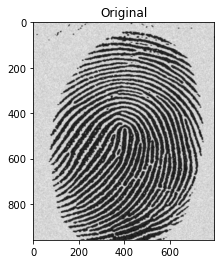

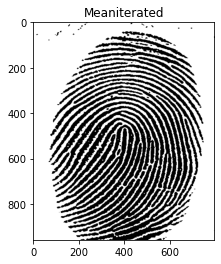

In [86]:
meaniteration_test(finger)

In [59]:
def otsu(img):
    h = img.shape[0]
    w = img.shape[1]
    threshold = 0
    max_wcv = 0
    # 遍历0-256
    for t in range(257):
        foreground = img[np.where(img <= t)] # 前景灰度
        background = img[np.where(img > t)] # 背景灰度
        wf = len(foreground) / (h * w)  # 计算占比
        wb = len(background) / (h * w)
        foreground_mean = np.mean(foreground) if len(foreground) > 0 else 0. # 计算均值
        background_mean = np.mean(background) if len(background) > 0 else 0.
        within_class_variance = wf * wb * (foreground_mean - background_mean) ** 2 # 计算类内方差
        if within_class_variance > max_wcv: # 比较
            max_wcv = within_class_variance
            threshold = t
    return threshold

In [71]:
def otsu_test(img):
    threshold=otsu(img)
    ret1, th1 = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)
    ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    print(f"My Otsu's threshold={ret1},Opencv's Otsu={ret2}")
    plt.imshow(img)
    plt.set_cmap('gray')
    plt.show()  
    plt.imshow(th1)
    plt.set_cmap('gray')
    plt.show()   
    plt.imshow(th2)
    plt.set_cmap('gray')
    plt.show()       

My Otsu's threshold=125.0,Opencv's Otsu=125.0


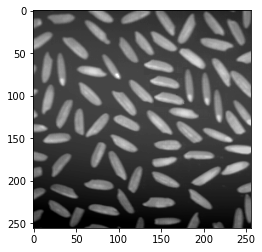

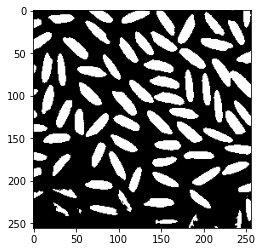

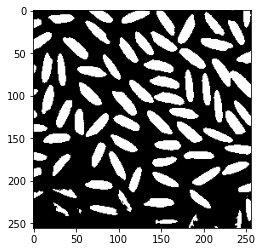

In [74]:
otsu_test(rice)

My Otsu's threshold=181.0,Opencv's Otsu=181.0


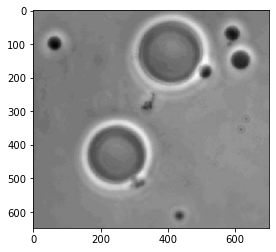

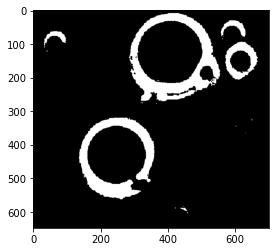

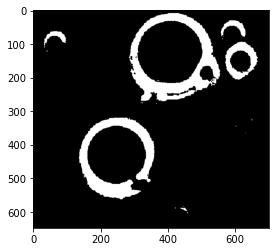

In [72]:
otsu_test(poly)

My Otsu's threshold=125.0,Opencv's Otsu=125.0


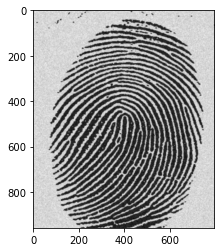

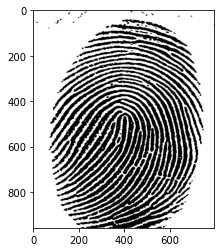

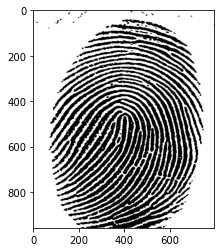

In [75]:
otsu_test(finger)